In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


# Uber Data Config

In [2]:
# Files to Load

uber_data_paths = [
    "Data/uber_data_aprsep_2014.csv",
    "Data/uber_data_janjune_2015.csv"
]

uber_ride_data_paths = [
    "Data/rides_per_day_aprsep_2014.csv",
    "Data/rides_per_day_janjune_2015.csv"
]

uber_summary_data_paths = [
    "Data/uber_summary_aprsep_2014.csv",
    "Data/uber_summary_janjune_2015.csv",
]


#### Uber Data with Times

In [3]:
# Initialize an empty list to store uber_ride_data
data_frames = []

# Read each CSV file and append its DataFrame to the list
for file_path in uber_data_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenate all DataFrames in the list into one DataFrame
uber_data = pd.concat(data_frames, ignore_index=True)
print("Uber Data:")
uber_data.head()

Uber Data:


,Base,Date,Time
0,B02512,2014-04-01,0:11:00
1,B02512,2014-04-01,0:17:00
2,B02512,2014-04-01,0:21:00
3,B02512,2014-04-01,0:28:00
4,B02512,2014-04-01,0:33:00


#### WIth Bases Listed

In [4]:
# Initialize an empty list to store uber_ride_data
data_frames = []

# Read each CSV file and append its DataFrame to the list
for file_path in uber_ride_data_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenate all DataFrames in the list into one DataFrame
uber_ride_data_wb = pd.concat(data_frames, ignore_index=True)
uber_ride_data_wb.head()

,Base,Date,Number of trips
0,B02512,2014-04-30,2107
1,B02512,2014-04-04,1768
2,B02512,2014-09-05,1752
3,B02512,2014-05-16,1686
4,B02512,2014-07-15,1618


#### Without Bases Listed

In [5]:
uber_ride_data_c = uber_ride_data_wb.copy()

# Remove the "Base" column
uber_ride_data_c = uber_ride_data_c.drop(columns=['Base'])

# Convert the "Date" column to datetime if it's not already
uber_ride_data_c['Date'] = pd.to_datetime(uber_ride_data_c['Date'])

# Group by "Date" and calculate the total number of trips for each unique date
uber_ride_data = uber_ride_data_c.groupby('Date')['Number of trips'].sum().reset_index()
uber_ride_data.head()

,Date,Number of trips
0,2014-04-01,14376
1,2014-04-02,17230
2,2014-04-03,20482
3,2014-04-04,26353
4,2014-04-05,19273


#### Uber Summary Data

In [6]:
# Initialize an empty list to store DataFrames
data_frames = []

# Read each CSV file and append its DataFrame to the list
for file_path in uber_summary_data_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenate all DataFrames in the list into one DataFrame
uber_summary_data = pd.concat(data_frames)

uber_summary_data = uber_summary_data.reset_index(drop=True)

uber_summary_data = uber_summary_data.drop([10, 11, 12])

print("Uber Summary Data:")
uber_summary_data

Uber Summary Data:


,Base,Total Trips,Maximum Trips,Minimum Trips,Start Date,End Date,Total Days,Average Trips/Day,Most Active Day,Least Active Day
0,B02512,200353,2107,391,2014-04-01,2014-09-30,183,1094.825137,2014-04-30,2014-07-05
1,B02598,1379578,13383,3509,2014-04-01,2014-09-30,183,7538.677596,2014-04-30,2014-07-05
2,B02617,1417983,16037,1934,2014-04-01,2014-09-30,183,7748.540984,2014-09-05,2014-04-20
3,B02682,1198901,13151,2867,2014-04-01,2014-09-30,183,6551.371585,2014-04-30,2014-07-05
4,B02764,254931,9229,114,2014-04-01,2014-09-30,183,1393.065574,2014-09-27,2014-07-05
5,B02617,248444,2500,377,2015-01-01,2015-06-30,181,1372.618785,2015-02-13,2015-04-05
6,B02598,1441905,12559,2860,2015-01-01,2015-06-30,181,7966.325967,2015-02-13,2015-01-27
7,B02682,1943107,17088,4322,2015-01-01,2015-06-30,181,10735.397790,2015-02-14,2015-01-27
8,B02764,3057302,37329,4454,2015-01-01,2015-06-30,181,16891.171271,2015-06-27,2015-01-27
9,B02512,5013875,46134,12271,2015-01-01,2015-06-30,181,27700.966851,2015-02-14,2015-01-27


# Weather Integration

In [7]:
weather_path = "Data/weather_data_2014-2015.csv"
weather_daily_path = "Data/weather_daily_summary_2014-2015.csv"

#### Weather Data with Daytimes

In [8]:
# Read each CSV file and append its DataFrame to the list
weather_data = pd.read_csv(weather_path)
weather_data.head()

,Date,time_HMS,temp,feels_like,temp_min,temp_max,humidity,wind_speed,Cloudiness,weather_description
0,2014-01-01,0:00:00,32.23,20.43,30.16,32.43,48,19.55,0,sky is clear
1,2014-01-01,1:00:00,30.78,18.18,30.15,31.26,50,23.00,0,sky is clear
2,2014-01-01,2:00:00,30.27,18.57,28.36,30.94,48,17.27,0,sky is clear
3,2014-01-01,3:00:00,28.78,16.18,26.56,29.95,46,20.69,0,sky is clear
4,2014-01-01,4:00:00,27.64,15.04,26.24,28.94,44,19.55,0,sky is clear


#### Weather Data by Days

In [9]:
weather_daily = pd.read_csv(weather_daily_path)
weather_daily.head()

,Date,Mean_Temp,Mean_Feels_Like,Min_Temp,Max_Temp,Mean_Humidity,Mean_Wind_Speed,Mean_Cloudiness,Weather_Description
0,2014-01-01,28.941667,19.074167,22.96,34.95,48.958333,12.807917,13.125000,sky is clear
1,2014-01-02,29.206538,18.154615,22.96,34.14,71.576923,16.800000,93.846154,overcast clouds
2,2014-01-03,16.499286,3.899286,10.04,26.55,75.642857,20.561786,75.714286,snow
3,2014-01-04,15.930417,5.985417,6.76,28.11,50.083333,8.940000,3.125000,sky is clear
4,2014-01-05,30.174138,22.742759,18.95,37.11,76.068966,8.063793,59.310345,sky is clear


# Weather and Ride Data

In [10]:
# Create an empty DataFrame to store the merged data
ride_weather_data = pd.DataFrame()

uber_ride_data['Date'] = pd.to_datetime(uber_ride_data['Date'])
weather_daily['Date'] = pd.to_datetime(weather_daily['Date'])


# Iterate through unique dates in uber_ride_data
for date in uber_ride_data['Date'].unique():
    datetime_value = pd.Timestamp(date)
    date_part = datetime_value.strftime('%Y-%m-%d')
    
    # Filter rows with the current date in uber_ride_data
    uber_rows = uber_ride_data[uber_ride_data['Date'] == date_part]
    
    # Filter rows with the current date in weather_daily
    weather_rows = weather_daily[weather_daily['Date'] == date_part]
    
    # Create a new DataFrame with the merged data
    merged_rows = pd.merge(uber_rows, weather_rows, on='Date')
    
    # Append the merged data to the overall merged_data DataFrame
    ride_weather_data = pd.concat([ride_weather_data, merged_rows], ignore_index=True)

ride_weather_data

,Date,Number of trips,Mean_Temp,Mean_Feels_Like,Min_Temp,Max_Temp,Mean_Humidity,Mean_Wind_Speed,Mean_Cloudiness,Weather_Description
0,2014-04-01,14376,46.994583,41.735417,35.94,61.03,47.708333,10.919167,0.833333,sky is clear
1,2014-04-02,17230,46.833333,43.668333,39.99,53.94,66.458333,6.657917,28.958333,sky is clear
2,2014-04-03,20482,52.919167,50.192083,42.01,67.35,50.791667,6.417083,0.000000,sky is clear
3,2014-04-04,26353,44.803077,38.980385,39.99,55.74,72.807692,11.565000,92.307692,light rain
4,2014-04-05,19273,45.201429,39.788929,39.00,55.36,71.392857,16.367857,77.321429,mist
...,...,...,...,...,...,...,...,...,...,...
359,2015-06-26,86287,73.835833,73.507083,68.99,80.49,55.083333,8.668750,62.500000,broken clouds
360,2015-06-27,109381,68.684400,68.369600,60.51,76.01,66.280000,9.359600,69.600000,overcast clouds
361,2015-06-28,80811,66.128611,66.526111,59.43,75.40,86.861111,15.771111,99.305556,mist
362,2015-06-29,66346,70.360417,69.815000,62.55,77.47,57.833333,11.585833,58.958333,overcast clouds


# Visualization

#### Temp vs. Number of Trips

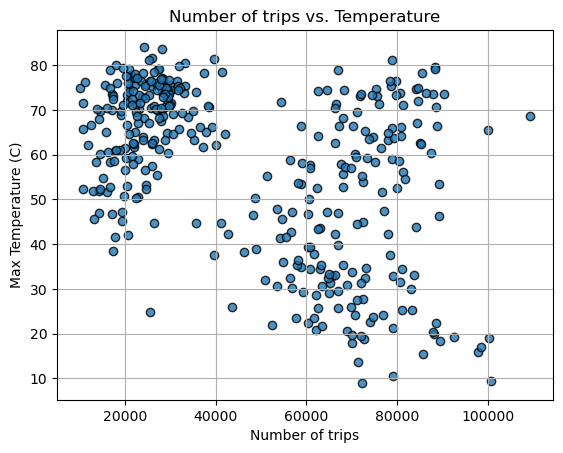

In [11]:
plt.scatter(ride_weather_data["Number of trips"], ride_weather_data["Mean_Temp"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties

plt.title("Number of trips vs. Temperature")
plt.xlabel("Number of trips")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Show plot
plt.show()

#### Humidity Vs. Number of Trips

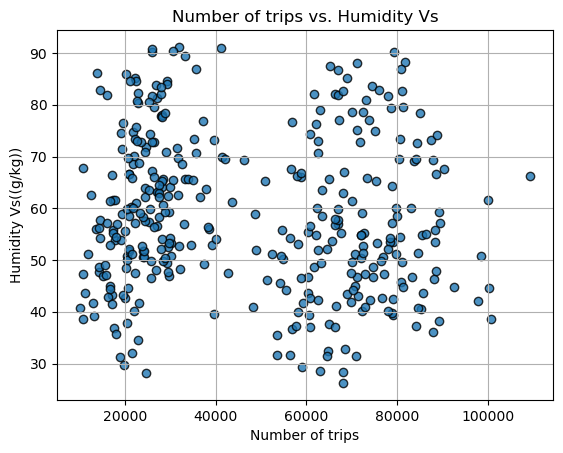

In [12]:
plt.scatter(ride_weather_data["Number of trips"], ride_weather_data["Mean_Humidity"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("Number of trips vs. Humidity Vs")
plt.xlabel("Number of trips")
plt.ylabel("Humidity Vs((g/kg))")
plt.grid(True)

# Show plot
plt.show()

#### Max Temp Vs. Number of Trips

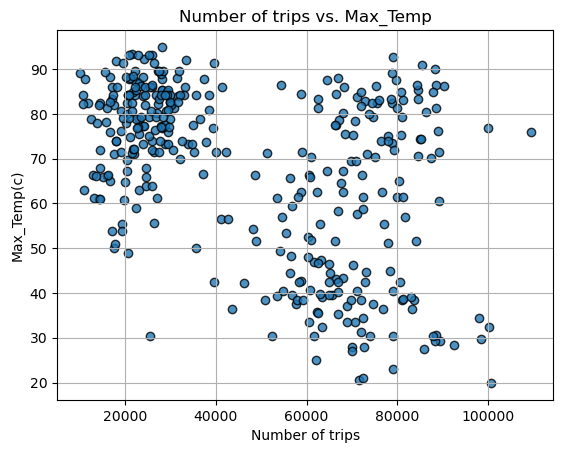

In [13]:
plt.scatter(ride_weather_data["Number of trips"], ride_weather_data["Max_Temp"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties

plt.title("Number of trips vs. Max_Temp")
plt.xlabel("Number of trips")
plt.ylabel("Max_Temp(c)")
plt.grid(True)

# Show plot
plt.show()

#### Min Temp Vs. Number of Trips

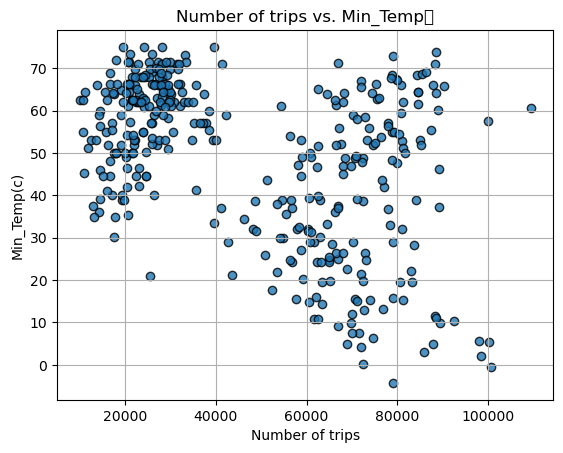

In [14]:
plt.scatter(ride_weather_data["Number of trips"], ride_weather_data["Min_Temp"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("Number of trips vs. Min_Temp	")
plt.xlabel("Number of trips")
plt.ylabel("Min_Temp(c)")
plt.grid(True)

# Show plot
plt.show()

#### Cloudiness Vs. Number of Trips

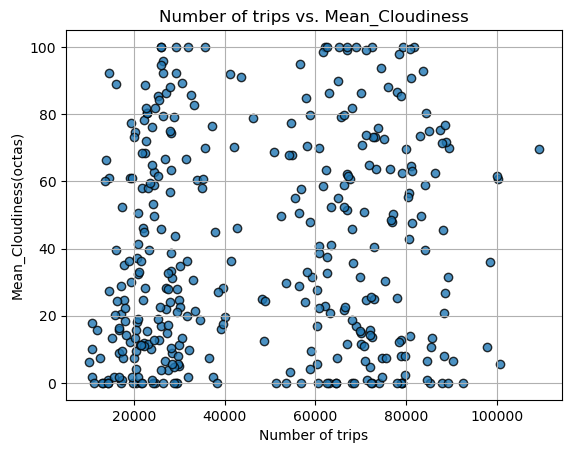

In [15]:
plt.scatter(ride_weather_data["Number of trips"], ride_weather_data["Mean_Cloudiness"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("Number of trips vs. Mean_Cloudiness")
plt.xlabel("Number of trips")
plt.ylabel("Mean_Cloudiness(octas)")
plt.grid(True)

# Show plot
plt.show()

#### Wind Speed Vs. Number of Trips

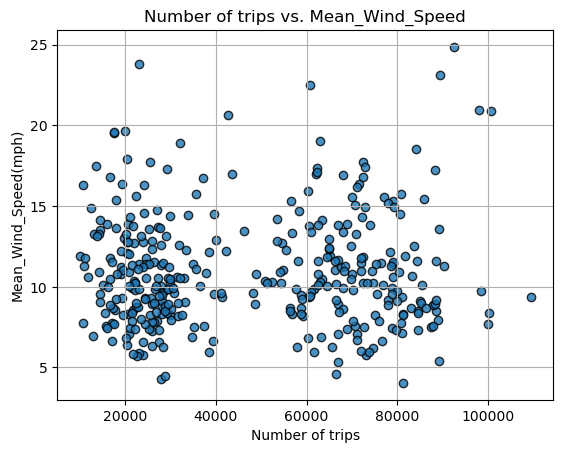

In [16]:
plt.scatter(ride_weather_data["Number of trips"], ride_weather_data["Mean_Wind_Speed"], marker="o", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("Number of trips vs. Mean_Wind_Speed")
plt.xlabel("Number of trips")
plt.ylabel("Mean_Wind_Speed(mph)")
plt.grid(True)

# Show plot
plt.show()

# Statistics 

# Weather and Ride Data  (w/Bases)

In [17]:
# Create an empty DataFrame to store the merged data
ride_weather_data_wb = pd.DataFrame()

uber_ride_data_wb['Date'] = pd.to_datetime(uber_ride_data_wb['Date'])
weather_daily['Date'] = pd.to_datetime(weather_daily['Date'])

# Iterate through unique dates in uber_ride_data_wb
for date in uber_ride_data_wb['Date'].unique():
    date_part = str(date)[:10]  # Convert to string and extract the date part
    
    # Filter rows with the current date in uber_ride_data_wb
    uber_rows = uber_ride_data_wb[uber_ride_data_wb['Date'] == date]
    
    # Filter rows with the current date in weather_daily
    weather_rows = weather_daily[weather_daily['Date'] == date_part]
    
    # Create a new DataFrame with the merged data
    merged_rows = pd.merge(uber_rows, weather_rows, on='Date')
    
    # Append the merged data to the overall ride_weather_data_wb DataFrame
    ride_weather_data_wb = pd.concat([ride_weather_data_wb, merged_rows], ignore_index=True)
